In [37]:
import pandas as pd
from tqdm.auto import tqdm
from rdkit import Chem
from rdkit.Chem import rdMolDescriptors
import numpy as np
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns

In [11]:
tqdm.pandas()

In [7]:
df = pd.read_csv("solubility_data_ok.csv")

In [8]:
property_names = list(rdMolDescriptors.Properties.GetAvailableProperties())
property_getter = rdMolDescriptors.Properties(property_names)

In [9]:
def smi2props(smi):
    mol = Chem.MolFromSmiles(smi)
    props = None
    if mol:
        props = np.array(property_getter.ComputeProperties(mol))
    return props

In [16]:
df['props'] = df.SMILES.progress_apply(smi2props)

  0%|          | 0/1818 [00:00<?, ?it/s]

In [20]:
train, test = train_test_split(df)

In [28]:
train_X = np.stack(train.props)
train_y = train.Solubility
test_X = np.stack(test.props)
test_y = test.Solubility

In [29]:
lgbm = LGBMRegressor()

In [30]:
lgbm.fit(train_X, train_y)

LGBMRegressor()

In [31]:
pred = lgbm.predict(test_X)

<AxesSubplot:xlabel='Solubility'>

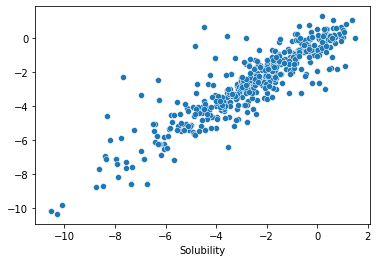

In [34]:
sns.scatterplot(x=test_y,y=pred)

In [36]:
r2_score(test_y,pred)

0.802115063434888

In [38]:
mean_squared_error(test_y,pred,squared=False)

0.9968012800730929